In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
#natural language toolkit
import nltk

In [3]:

file_path = r'D:\Downloads\archive (2)\Reviews.csv'

df = pd.read_csv(file_path)
df=df.head(500)


In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


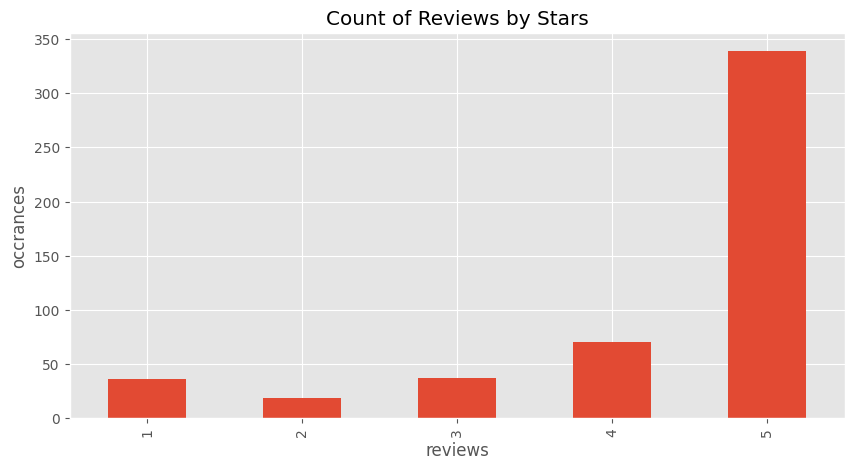

In [5]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Stars',figsize=(10,5))
ax.set_xlabel('reviews')
ax.set_ylabel('occrances')
plt.show(ax)

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia=SentimentIntensityAnalyzer()

In [7]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
#VADER RESULTS
pd.DataFrame(res).T

""


In [9]:
vaders = pd.DataFrame(res).T
#the current index will be moved inside as a coloumn and will be renamed as
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders=vaders.merge(df,how='left')
vaders.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


In [10]:
ax=sns.barplot(data=vaders,x='Score',y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

ValueError: Could not interpret value `compound` for `y`. An entry with this name does not appear in `data`.

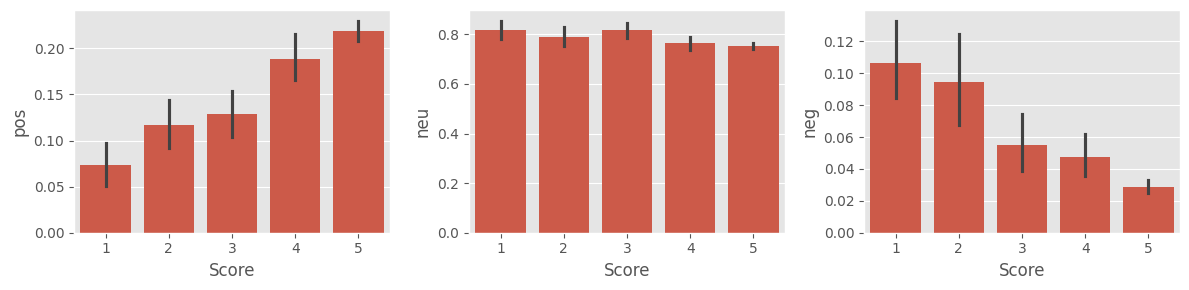

In [ ]:
fig,axs=plt.subplots(1,3,figsize=(12,3))
sns.barplot(data=vaders,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu',ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg',ax=axs[2])
plt.tight_layout()
plt.show()




In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
import torch
print(torch.__version__)



2.3.1+cpu


In [ ]:
#getting the roberta model instead of the Vader Model
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch

# Load pre-trained RoBERTa model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)  # Assuming 3 labels for sentiment (e.g., positive, negative, neutral)

# Function to perform sentiment analysis using RoBERTa model
def polarity_scores_roberta(text):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    
    # Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
    
    # Convert logits to probabilities using softmax
    probabilities = torch.softmax(logits, dim=1).squeeze().tolist()
    
    # Map probabilities to sentiment labels (e.g., positive, negative, neutral)
    sentiment_labels = ['negative', 'neutral', 'positive']
    sentiment_scores = {f'roberta_{label}': score for label, score in zip(sentiment_labels, probabilities)}
    
    return sentiment_scores

# Test the function with sample input text
text = "I love this product!"
roberta_result = polarity_scores_roberta(text)
print("RoBERTa sentiment scores:", roberta_result)


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

c:\Users\sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\sahil\.cache\huggingface\hub\models--roberta-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

c:\Users\sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RoBERTa sentiment scores: {'roberta_negative': 0.3653565049171448, 'roberta_neutral': 0.323397696018219, 'roberta_positive': 0.31124579906463623}


In [ ]:
example=df['Text'][0]
print(example)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [ ]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')


NameError: name 'tqdm' is not defined

In [ ]:
print(res)

{1: {'vader_neg': 0.0, 'vader_neu': 0.695, 'vader_pos': 0.305, 'vader_compound': 0.9441, 'roberta_negative': 0.3542679250240326, 'roberta_neutral': 0.33419907093048096, 'roberta_positive': 0.31153300404548645}, 2: {'vader_neg': 0.138, 'vader_neu': 0.862, 'vader_pos': 0.0, 'vader_compound': -0.5664, 'roberta_negative': 0.3588448166847229, 'roberta_neutral': 0.3280186057090759, 'roberta_positive': 0.31313663721084595}, 3: {'vader_neg': 0.091, 'vader_neu': 0.754, 'vader_pos': 0.155, 'vader_compound': 0.8265, 'roberta_negative': 0.35918989777565, 'roberta_neutral': 0.3272671401500702, 'roberta_positive': 0.3135429620742798}, 4: {'vader_neg': 0.0, 'vader_neu': 1.0, 'vader_pos': 0.0, 'vader_compound': 0.0, 'roberta_negative': 0.3572879135608673, 'roberta_neutral': 0.33029505610466003, 'roberta_positive': 0.31241700053215027}, 5: {'vader_neg': 0.0, 'vader_neu': 0.552, 'vader_pos': 0.448, 'vader_compound': 0.9468, 'roberta_negative': 0.3614494502544403, 'roberta_neutral': 0.32714661955833435, 

In [ ]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')


In [ ]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.354268,0.334199,0.311533,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.358845,0.328019,0.313137,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.359190,0.327267,0.313543,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.357288,0.330295,0.312417,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.361449,0.327147,0.311404,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


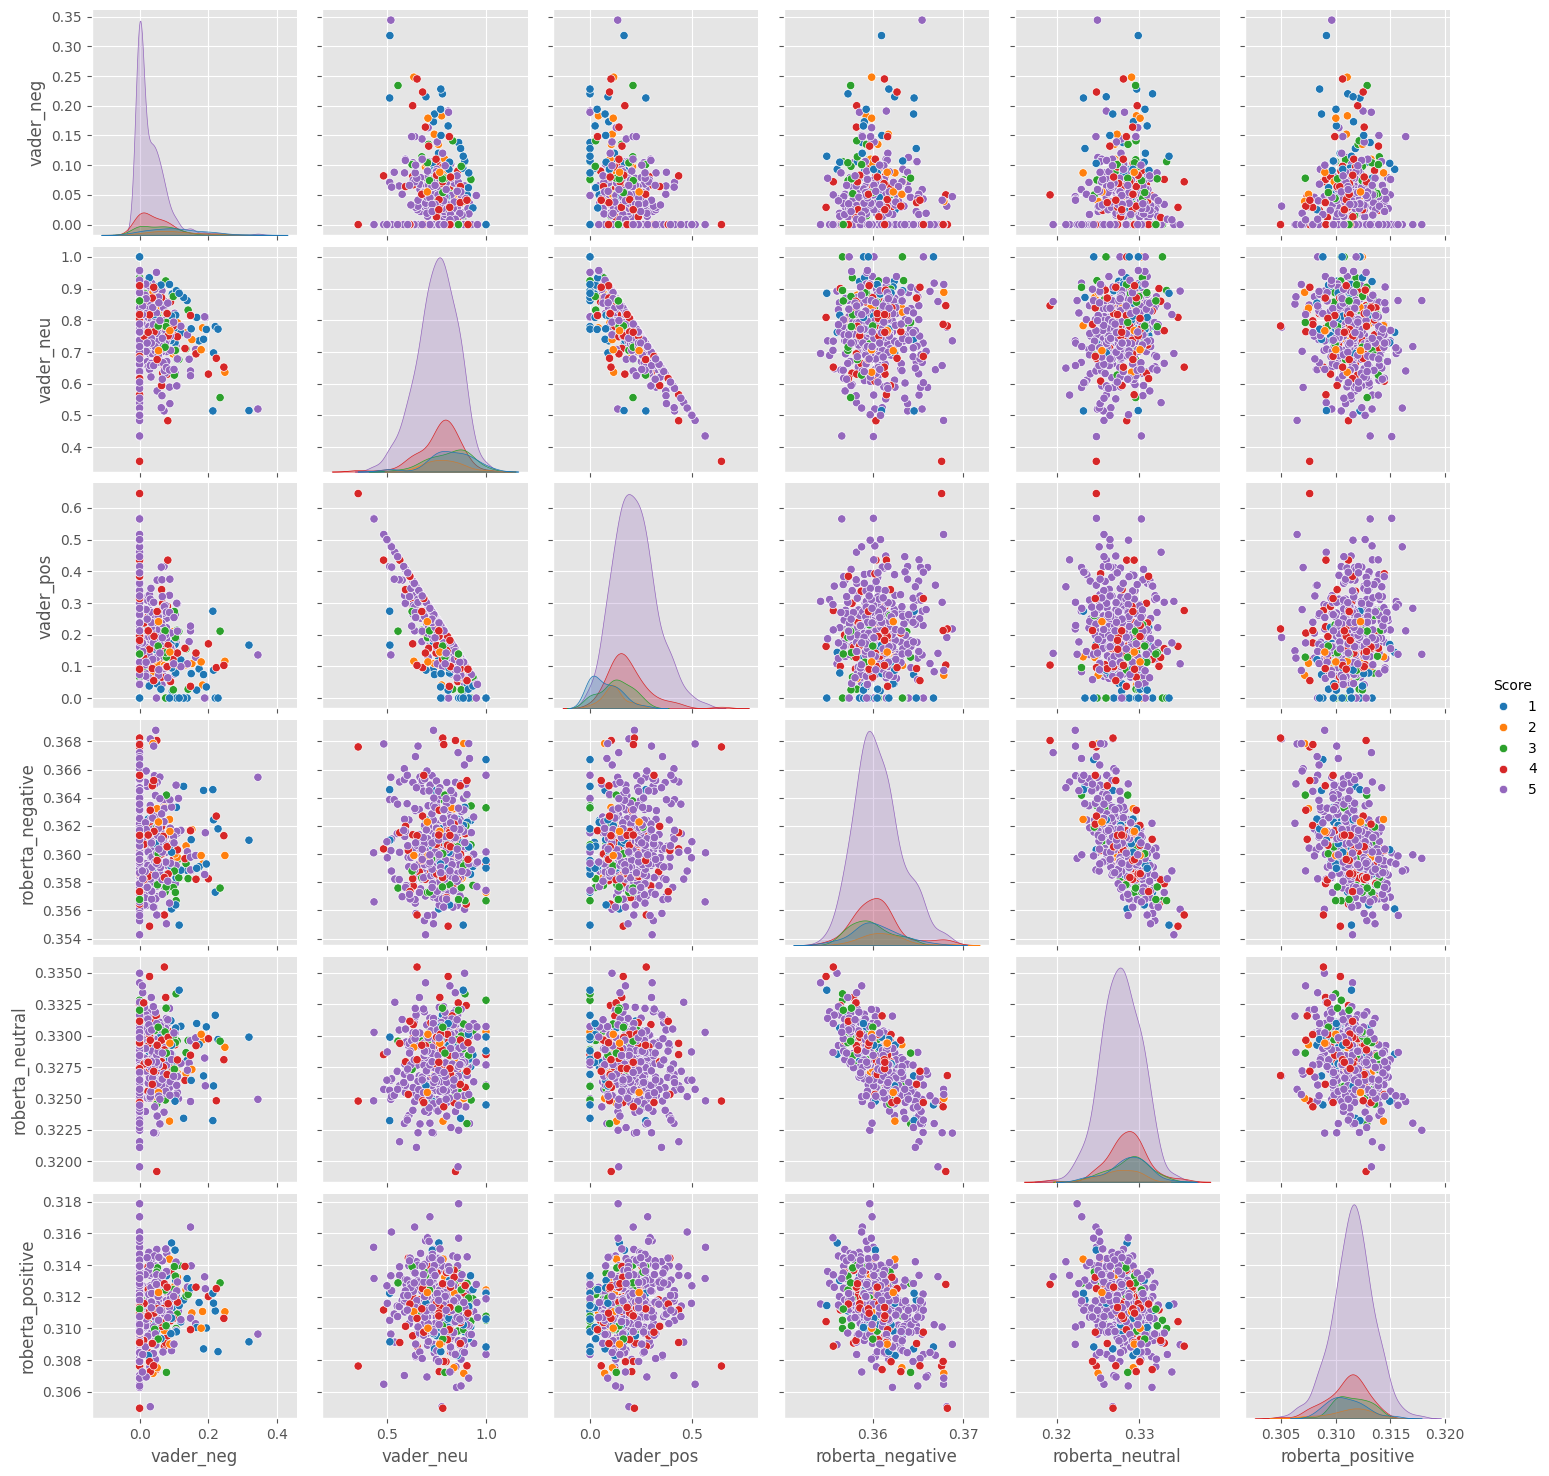

In [ ]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_negative', 'roberta_neutral', 'roberta_positive'],
            hue='Score',
            palette='tab10')
plt.show()

In [ ]:
results_df('Score==1')